# Introducción al Procesamiento de Lenguaje Natural

## Identificar el texto a analizar

¡Hola, mundo de la PNL! En este ejemplo, vamos a desarrollar los conceptos básicos del procesamiento de texto que se utilizarán más adelante.

## Preprocesar el texto para el análisis

Implica limpiar y preprocesar los datos para prepararlos para el análisis.

Los pasos incluyen:

### Segmentación de oraciones

Es el proceso de dividir un texto en oraciones individuales. Conocido en inglés como `tokenizing by sentence`

In [1]:
import nltk
nltk.download('punkt') # Modelo ML no supervisado

texto = "¡Hola, mundo del PLN! En este ejemplo, vamos a desarrollar los conceptos básicos del procesamiento de texto que se utilizarán más adelante."

oraciones = nltk.sent_tokenize(texto)

print(oraciones)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['¡Hola, mundo del PLN!', 'En este ejemplo, vamos a desarrollar los conceptos básicos del procesamiento de texto que se utilizarán más adelante.']


### Eliminación de caracteres no deseados, puntuaciones, símbolos, etc.

In [2]:
import string

def eliminar_puntuaciones(str_entrada):
    simbolos = string.punctuation
    return "".join(char for char in str_entrada if char not in simbolos)

texto_limpio = eliminar_puntuaciones(texto)
print(texto_limpio)

¡Hola mundo del PLN En este ejemplo vamos a desarrollar los conceptos básicos del procesamiento de texto que se utilizarán más adelante


Agregar configuraciones regionales.

In [3]:
def eliminar_en_espanol(str_entrada):
    simbolos_espanol = string.punctuation + "¡" + "¿"
    return "".join(char for char in str_entrada if char not in simbolos_espanol)

texto_limpio = eliminar_en_espanol(texto)
print(texto_limpio)

Hola mundo del PLN En este ejemplo vamos a desarrollar los conceptos básicos del procesamiento de texto que se utilizarán más adelante


### Convertir la cadena a minúsculas

Esto puede ayudar a reducir el tamaño del vocabulario al tratar las palabras en mayúsculas y minúsculas como la misma palabra, lo que puede ayudar con algunas tareas de PLN, como la clasificación de texto y el análisis de sentimientos.

In [4]:
texto_minusculas = texto_limpio.lower()
print(texto_minusculas)

hola mundo del pln en este ejemplo vamos a desarrollar los conceptos básicos del procesamiento de texto que se utilizarán más adelante


### Segmentación de palabras

Las palabras son como los átomos del lenguaje natural. Son la unidad de significado más pequeña que todavía tiene sentido por sí sola. Se conoce en inglés como `tokenizing by word`.

In [5]:
tokens = nltk.word_tokenize(texto_minusculas)
print(tokens)

['hola', 'mundo', 'del', 'pln', 'en', 'este', 'ejemplo', 'vamos', 'a', 'desarrollar', 'los', 'conceptos', 'básicos', 'del', 'procesamiento', 'de', 'texto', 'que', 'se', 'utilizarán', 'más', 'adelante']


### Palabras vacías

Las palabras vacías (`stop words`) son palabras que se pueden ignorar, por lo que se filtran del texto cuando se procesa, ya que no añaden mucho significado al texto en sí mismas.

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("spanish"))
tokens_limpios = [token for token in tokens if token not in stop_words]
print(tokens_limpios)

#tokens_limpios = []
#for token in tokens:
#  if token not in stop_words:
#    tokens_limpios.append(token)

['hola', 'mundo', 'pln', 'ejemplo', 'vamos', 'desarrollar', 'conceptos', 'básicos', 'procesamiento', 'texto', 'utilizarán', 'adelante']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Stemming y lemmatization

`Stemming` y `lemmatization` son métodos utilizados por el PLN para analizar el significado de una palabra. `Stemming` usa la raíz de la palabra, mientras que `lemmatization` usa el contexto en el que se usa la palabra.

**Stemming**

Stemming (derivación) es un proceso que deriva o elimina los últimos caracteres de una palabra, lo que a menudo conduce a significados y ortografía incorrectos.

Por ejemplo, al derivar la palabra "*Caring*" se obtendría "*Car*".

Stemming se utiliza en caso de conjuntos de datos grandes donde el rendimiento es un problema.

**Lemmatization**

Lemmatization considera el contexto y convierte la palabra a su forma base significativa, que se llama `Lemma`.

Por ejemplo, lematizar la palabra "*Caring*" devolvería "*Care*".

La lematización es computacionalmente costosa ya que implica una revisión detallada.

In [7]:
# stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokens_derivados = [stemmer.stem(token) for token in tokens_limpios]
print(tokens_derivados)

# lemmatizing
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(token) for token in tokens_limpios]
print(tokens_lematizados)

['hola', 'mundo', 'pln', 'ejemplo', 'vamo', 'desarrollar', 'concepto', 'básico', 'procesamiento', 'texto', 'utilizarán', 'adelant']


[nltk_data] Downloading package wordnet to /root/nltk_data...


['hola', 'mundo', 'pln', 'ejemplo', 'vamos', 'desarrollar', 'conceptos', 'básicos', 'procesamiento', 'texto', 'utilizarán', 'adelante']


Español

In [8]:
# stemming
from nltk.stem import SnowballStemmer
stemmer_espanol = SnowballStemmer('spanish')
tokens_derivados = [stemmer_espanol.stem(token) for token in tokens_limpios]
print(tokens_derivados)

# lemmatizing
import spacy
!python -m spacy download es_core_news_sm
nlp = spacy.load('es_core_news_sm')
doc = nlp(' '.join(tokens_limpios))
tokens_lematizados = [token.lemma_ for token in doc]
print(tokens_lematizados)

!pip install stanza
import stanza
stanza.download('es')
nlp = stanza.Pipeline('es')
doc = nlp(' '.join(tokens_limpios))
tokens_lematizados = [word.lemma for sent in doc.sentences for word in sent.words]
print(tokens_lematizados)

['hol', 'mund', 'pln', 'ejempl', 'vam', 'desarroll', 'concept', 'basic', 'proces', 'text', 'utiliz', 'adel']
2023-11-22 15:48:31.124189: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 15:48:31.124268: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 15:48:31.124318: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 15:48:32.026992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 110.6 MB/s eta 0:00:00
✔ Download and installation successful
You can 

INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package         |
----------------------------------
| tokenize     | ancora          |
| mwt          | ancora          |
| pos          | ancora_charlm   |
| lemma        | ancora_nocharlm |
| constituency | combined_charlm |
| depparse     | ancora_charlm   |
| sentiment    | tass2020        |
| ner          | conll02         |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


['holo', 'mundo', 'pln', 'ejemplo', 'ir', 'desarrollar', 'concepto', 'básico', 'procesamiento', 'texto', 'utilizar', 'adelante']


**Inicial**

['hola', 'mundo', 'nlp', 'ejemplo', 'vamos', 'desarrollar', 'conceptos', 'básicos', 'procesamiento', 'texto', 'utilizarán', 'adelante']

**Spacy**

['holar', 'mundo', 'nlp', 'ejemplo', 'ir', 'desarrollar', 'concepto', 'básico', 'procesamiento', 'texto', 'utilizar', 'adelante']

**Stanza**

['holo', 'mundo', 'nlp', 'ejemplo', 'ir', 'desarrollar', 'concepto', 'básico', 'procesamiento', 'texto', 'utilizar', 'adelante']

## Analizar el texto

### Partes del discurso (Part-of-Speech tagging)

Consiste en asignar a cada palabra en un texto su correspondiente categoría gramatical, como sustantivo, verbo, adjetivo, etc.

In [9]:
nltk.download('cess_esp')
from nltk.corpus import cess_esp
oraciones_cess = cess_esp.tagged_sents()
etiquetador_unigram = nltk.UnigramTagger(oraciones_cess)

etiquetas_pos = etiquetador_unigram.tag(tokens_limpios)
print(etiquetas_pos)


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


[('hola', None), ('mundo', 'ncms000'), ('pln', None), ('ejemplo', 'ncms000'), ('vamos', 'vmip1p0'), ('desarrollar', 'vmn0000'), ('conceptos', 'ncmp000'), ('básicos', 'aq0mp0'), ('procesamiento', None), ('texto', 'ncms000'), ('utilizarán', 'vmif3p0'), ('adelante', 'rg')]


**Descripción de las etiquetas**

- `ncms000`:
  - `nc` indica que es un sustantivo común (`nombre común`).
  - `m` indica que es masculino.
  - `s` indica que es singular.
  - Los ceros (`000`) son rellenos y no aportan información adicional en este contexto.

- `vmip1p0`:
  - `vm` indica que es un verbo principal (`verbo`).
  - `i` indica que es indicativo.
  - `p` indica que es presente.
  - `1p` indica que es de primera persona del plural.
  - `0` es un relleno.

- `vmn0000`:
  - `vm` indica que es un verbo principal (`verbo`).
  - `n` indica que es un infinitivo.
  - Los ceros (`0000`) son rellenos.

- `ncmp000`:
  - `nc` indica que es un sustantivo común (`nombre común`).
  - `mp` indica que es masculino plural.
  - Los ceros (`000`) son rellenos.

- `aq0mp0`:
  - `aq` indica que es un adjetivo calificativo.
  - `0` es un relleno que normalmente indica grado pero aquí no se aplica.
  - `mp` indica que es masculino plural.
  - `0` es un relleno al final.

- `rg`:
  - `rg` indica que es un adverbio general.

Para un entendimiento detallado, buscar la documentación del corpus CESS-ESP.

In [10]:
def interpretar_etiquetas(lista_etiquetas_pos):
    descripcion_etiquetas = {
        'nc': 'sustantivo común',
        'vm': 'verbo principal',
        'ncmp': 'sustantivo común masculino plural',
        'aq': 'adjetivo calificativo',
        'rg': 'adverbio general',
    }

    def interpretar_etiqueta(etiqueta):
        if etiqueta is None:
            return 'Etiqueta no disponible'

        etiqueta_principal = ''.join([c for c in etiqueta if not c.isdigit()])
        base = etiqueta_principal[:2]
        morfologia = etiqueta_principal[2:]

        interpretacion_base = descripcion_etiquetas.get(base, f'Etiqueta "{base}" no reconocida')

        detalles_morfologicos = []
        if 'm' in morfologia:
            detalles_morfologicos.append('masculino')
        if 'f' in morfologia:
            detalles_morfologicos.append('femenino')
        if 's' in morfologia:
            detalles_morfologicos.append('singular')
        if 'p' in morfologia:
            detalles_morfologicos.append('plural')
        if '1' in morfologia:
            detalles_morfologicos.append('primera persona')
        if '2' in morfologia:
            detalles_morfologicos.append('segunda persona')
        if '3' in morfologia:
            detalles_morfologicos.append('tercera persona')
        if 'i' in morfologia:
            detalles_morfologicos.append('indicativo')
        if 'n' in morfologia:
            detalles_morfologicos.append('infinitivo')

        interpretacion_completa = f'{interpretacion_base} ' + ' '.join(detalles_morfologicos)
        return interpretacion_completa

    interpretaciones = [(palabra, etiqueta, interpretar_etiqueta(etiqueta)) for palabra, etiqueta in lista_etiquetas_pos]
    return interpretaciones

interpretaciones = interpretar_etiquetas(etiquetas_pos)
for palabra, etiqueta, interpretacion in interpretaciones:
    print(f"{palabra} ({etiqueta}): {interpretacion}")


hola (None): Etiqueta no disponible
mundo (ncms000): sustantivo común masculino singular
pln (None): Etiqueta no disponible
ejemplo (ncms000): sustantivo común masculino singular
vamos (vmip1p0): verbo principal plural indicativo
desarrollar (vmn0000): verbo principal infinitivo
conceptos (ncmp000): sustantivo común masculino plural
básicos (aq0mp0): adjetivo calificativo masculino plural
procesamiento (None): Etiqueta no disponible
texto (ncms000): sustantivo común masculino singular
utilizarán (vmif3p0): verbo principal femenino plural indicativo
adelante (rg): adverbio general 


## Visualización

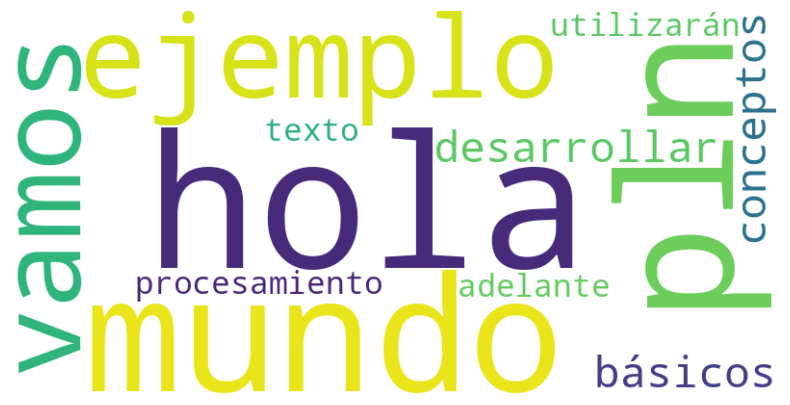

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto_limpio = ' '.join(tokens_limpios)

nube = WordCloud(width=800, height=400, background_color ='white').generate(texto_limpio)
plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

# Casos prácticos

## Corrector de ortografía

Corrige textos en inglés basado en "*la palabra más cercana*".  Esta se refiere a la palabra que tiene la menor distancia de edición, también conocida como **distancia de Levenshtein**.

La distancia de edición entre dos palabras es el número mínimo de operaciones necesarias para transformar una palabra en la otra. Las operaciones típicamente incluyen inserciones, eliminaciones y sustituciones de un solo carácter. Por ejemplo:

- Palabra mal escrita: "aplle"
  - "apple" - Distancia de edición: 1 (sustituir 'l' por 'p')
  - "apply" - Distancia de edición: 2 (sustituir 'l' por 'p' y 'e' por 'y')

En este ejemplo, la que tiene menor distancia de edición es "apple", por lo que sería la palabra usada por el corrector.

In [12]:
from nltk.corpus import words
from nltk.metrics.distance import edit_distance
from nltk.tokenize import word_tokenize

nltk.download('words')

# Palabras en inglés de NLTK
corpus_ingles = set(p.lower() for p in words.words())

# Función para encontrar la palabra más cercana
def corrige_palabra(palabra, vocabulario=corpus_ingles, dist_max=2):
    if palabra in vocabulario:
        return palabra  # La palabra está correctamente escrita
    palabras_cercanas = [p for p in vocabulario if edit_distance(p, palabra) <= dist_max]
    if not palabras_cercanas:
        return palabra
    palabras_cercanas.sort(key=lambda p: (edit_distance(p, palabra), p))
    return palabras_cercanas[0]

# Función para corregir cada palabra en una frase
def corrige_frase(frase, vocabulario=corpus_ingles, dist_max=2):
    tokens = word_tokenize(frase)
    frase_corregida = [corrige_palabra(p, vocabulario, dist_max) for p in tokens]
    return ' '.join(frase_corregida)

# Ejemplo de una frase con errores ortográficos
frase_a_corregir = "I havv goood speling"

# Corregir la frase
frase_corregida = corrige_frase(frase_a_corregir)
frase_corregida

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


'a harv good apeling'

Usando un modelo pre-entrenado.

In [13]:
!pip install textblob
from textblob import TextBlob

def corrige_frase(texto):
    blob = TextBlob(texto)
    texto_corregido = blob.correct()
    return texto_corregido

frase_a_corregir = "I havv goood speling"

frase_corregida = corrige_frase(frase_a_corregir)
frase_corregida


TextBlob("I have good spelling")